<a href="https://colab.research.google.com/github/PatrickRuan/3rd-ML100Days/blob/master/homework/Day71_loss_function_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [22]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [0]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))
#檢查model 的STACK
print(model.summary())

In [0]:
#卷積層1

In [8]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [9]:
model.add(Dropout(rate=0.25))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#卷積層2與池化層2

In [0]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [0]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(10, activation='softmax'))

In [17]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [0]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history1 =model.fit(x=x_img_train_normalize,
                         y=y_label_train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)


'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/10





40000/40000 [==============================] - 171s 4ms/step - loss: 1.9446 - acc: 0.2981 - val_loss: 1.8704 - val_acc: 0.3572
Epoch 2/10
40000/40000 [==============================] - 170s 4ms/step - loss: 1.5992 - acc: 0.4252 - val_loss: 1.5428 - val_acc: 0.4839
Epoch 3/10
40000/40000 [==============================] - 171s 4ms/step - loss: 1.4338 - acc: 0.4849 - val_loss: 1.4340 - val_acc: 0.5297
Epoch 4/10
40000/40000 [==============================] - 168s 4ms/step - loss: 1.3304 - acc: 0.5248 - val_loss: 1.3554 - val_acc: 0.5717
Epoch 5/10
40000/40000 [==============================] - 167s 4ms/step - loss: 1.2574 - acc: 0.5531 - val_loss: 1.3086 - val_acc: 0.5801
Epoch 6/10
40000/40000 [==============================] - 148s 4ms/step - loss: 1.1942 - acc: 0.5762 - val_loss: 1.2463 - val_acc: 0.5987
Epoch 7/10
40000/400

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [26]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))
#檢查model 的STACK
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [27]:
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
train_history2 =model.fit(x=x_img_train_normalize,
                         y=y_label_train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 181s 5ms/step - loss: 0.0898 - acc: 0.1287 - val_loss: 0.0895 - val_acc: 0.1806
Epoch 2/10
40000/40000 [==============================] - 155s 4ms/step - loss: 0.0892 - acc: 0.1553 - val_loss: 0.0891 - val_acc: 0.2055
Epoch 3/10
40000/40000 [==============================] - 160s 4ms/step - loss: 0.0886 - acc: 0.1768 - val_loss: 0.0886 - val_acc: 0.2390
Epoch 4/10
40000/40000 [==============================] - 153s 4ms/step - loss: 0.0877 - acc: 0.1994 - val_loss: 0.0879 - val_acc: 0.2542
Epoch 5/10
40000/40000 [==============================] - 156s 4ms/step - loss: 0.0867 - acc: 0.2161 - val_loss: 0.0869 - val_acc: 0.2584
Epoch 6/10
40000/40000 [==============================] - 154s 4ms/step - loss: 0.0856 - acc: 0.2364 - val_loss: 0.0861 - val_acc: 0.2748
Epoch 7/10
40000/40000 [==============================] - 147s 4ms/step - loss: 0.0846 - acc: 0.2499 - val_loss: 0.0852 - 

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

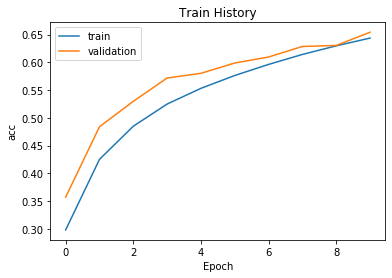

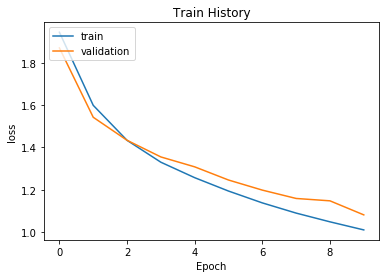

In [30]:
show_train_history(train_history1,'acc','val_acc')
show_train_history(train_history1,'loss','val_loss')

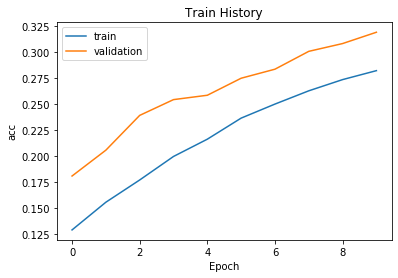

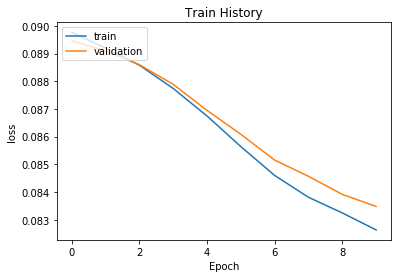

In [31]:
show_train_history(train_history2,'acc','val_acc')
show_train_history(train_history2,'loss','val_loss')